# Car Price Prediction Project

## Exploratory Data Analysis

### Exploratory Data Analysis Toolbox

In [110]:
#A Import NumPy: library for numerical operations
#B Import Pandas: library for tabular data
#C Import plotting libraries: matplotlib and seaborn
# matplotlib inline: Enures that plots are rendered correctly in jupyter notebooks

import pandas as pd #A
import numpy as np #B

from matplotlib import pyplot as plt #C
import seaborn as sns #C
%matplotlib inline 

## Reading and preparing the data

In [111]:
df = pd.read_csv('data.csv')
len(df)

11914

In [112]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [113]:
# A Lowercases all the column names, and replace spaces with underscores.
# B Selects only columns with string values.
# C Lowercases and replaces spaces with underscores for values in all string columns of the dataframe.

df.columns = df.columns.str.lower().str.replace(' ', '_') # A

string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C



In [114]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Target variable analysis

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


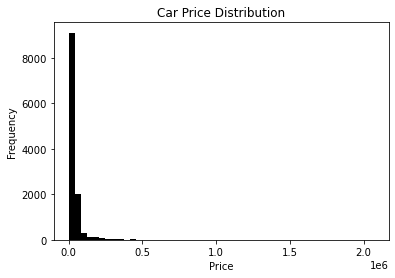

In [115]:
plt.figure(figsize=(6, 4))

sns.distplot(df.msrp, kde=False, hist_kws=dict(color='black', alpha=1))
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Car Price Distribution')

plt.show()

/home/abdulrahman/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


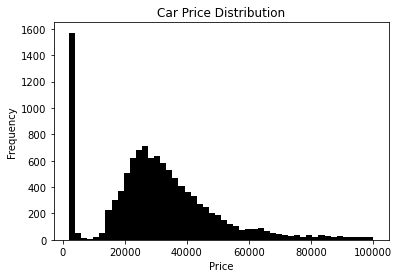

In [116]:
plt.figure(figsize=(6, 4))

sns.distplot(df.msrp[df.msrp < 100000], kde=False, hist_kws=dict(color
='black', alpha=1))

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Car Price Distribution')

plt.show()

## Log function application for log transformation

In [117]:
log_price = np.log1p(df.msrp)

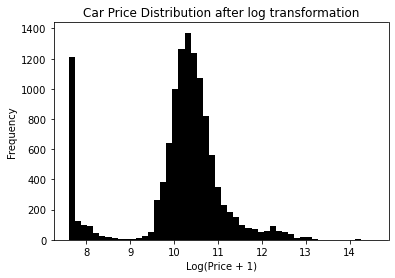

In [118]:
plt.figure(figsize=(6, 4))

sns.distplot(log_price, kde=False, hist_kws=dict(color='black', alpha=1))
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Car Price Distribution after log transformation')

plt.show()

## Checking for missing values

In [119]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Validation Framework

### Splitting the Data into validation, test, and training sets.

In [120]:
#A Fixes the random seed to ensure that the results are reproducible.
#B Obtains the number of rows in the dataframe.
#C Calculate how many data rows should should be alloacted for training, validation, and testing.
#D Create a NumPy array with indices from 0 to (n-1) and shuffle it.
#E Uses the array with indices to obtain a shuffled dataframe.
#F Split the shuffled dataframe into training, validation, and testing categories.

np.random.seed(2) #A

n = len(df) #B

n_val = int(0.2 * n) #C
n_test = int(0.2 * n) #C
n_train = n - (n_val + n_test) #C

idx = np.arange(n) #D
np.random.shuffle(idx) #D

df_shuffled = df.iloc[idx] #E

df_train = df_shuffled.iloc[:n_train].copy() #F
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy() #F
df_test = df_shuffled.iloc[n_train+n_val:].copy() #F

In [121]:
# Applying log transformation for each of the 3 dataframes

y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']


## Machine Learning for Regression

### Linear Regression implementation using Numpy

In [122]:
# Translates the mathematical notation of Linear Regression function to Python
#A Creates an array containing only 1s.
#B Adds the array of 1s as the first column of X.
#C Computes X T X.
#D Computes the inverse of X T X.
#E Computes the rest of the normal equation.
#F Splits the weights vector into the bias and the rest of the weights.

def linear_regression(X, y):
    # adding the dummy column
    ones = np.ones(X.shape[0]) #A
    X  = np.column_stack([ones, X]) #B
    
    XTX = X.T.dot(X) #C
    XTX_inv = np.linalg.inv(XTX) #D
    w = XTX_inv.dot(X.T).dot(y) #E
    
    return w[0], w[1:] #F

## Price Prediction

### Baseline Solution

In [123]:
# Selects features from the dataframes and writes them to a new variable

base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [124]:
# Function for converting a dataframe into a matrix

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [125]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

In [126]:
y_pred = w_0 + X_train.dot(w)

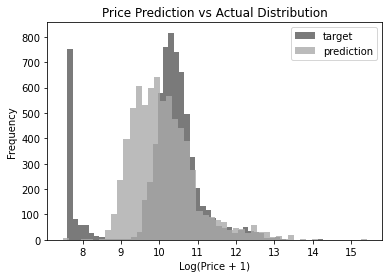

In [127]:
plt.figure(figsize=(6, 4))

sns.distplot(y_train, label='target', kde=False,
            hist_kws=dict(color='#222222', alpha=0.6))
sns.distplot(y_pred, label='prediction', kde=False,
            hist_kws=dict(color='#aaaaaa', alpha=0.8))

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

### Root Mean Squared Error (RMSE) implementation

In [128]:
#A Compute the difference between the prediction and the target.
#B Compute MSE: first compute the squared error and then calculate its mean.
#C Take the square root to get RMSE.

def rmse(y, y_pred):
    error = y_pred - y #A
    mse = (error ** 2).mean() #B
    return np.sqrt(mse) #C

In [129]:
rmse(y_train, y_pred)

0.7554192603920132

In [130]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [131]:
rmse(y_val, y_pred)

0.7616530991301591

## Feature Engineering

In [132]:
# Function for creating the “age” feature in the prepare_X function.
#A Creates a copy of the input parameter to prevent side effects.
#B Creates a copy of the base list with the basic features.
#C Computes the age feature.
#D Appends age to the list of feature names we use for the model.

def prepare_X(df):
    df = df.copy() #A
    features = base.copy() #B
    
    df['age'] = 2017 - df.year #C
    features.append('age') #D
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [133]:
#A Trains the model
#B Apply the model to the validation dataset
#C Computes RMSE on the validation data

X_train = prepare_X(df_train) #A
w_0, w = linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val) #B
y_pred = w_0 + X_val.dot(w) #B
print('validation', rmse(y_val, y_pred)) #C

train 0.5175055465840046
validation 0.5172055461058329


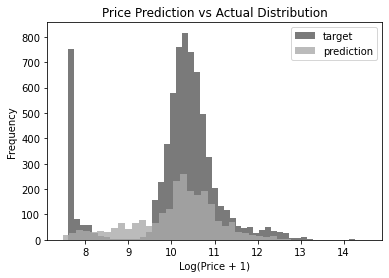

In [134]:
plt.figure(figsize=(6, 4))

sns.distplot(y_train, label='target', kde=False,
            hist_kws=dict(color='#222222', alpha=0.6))
sns.distplot(y_pred, label='prediction', kde=False,
            hist_kws=dict(color='#aaaaaa', alpha=0.8))

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Price Prediction vs Actual Distribution')

plt.show()

In [135]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

### Handling categorical variables

In [136]:
# Function for handling categorical variables “number of doors” and “make” in the prepare_X function
#A Iterates over possible values of the “number of doors” variable.
#B Gives a feature a meaningful name, such as “num_doors_2” for v=2.
#C Creates the one-hot encoding feature.
#D Adds the feature back to the dataframe, using the name from B.

def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]: #A
        feature = 'num_doors_%s' % v #B
        df[feature] = (df['number_of_doors'] == v).astype(int) #C
        features.append(feature) #D
        
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [137]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.5076038849555213


In [138]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [139]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [140]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.474825673722643


In [141]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [142]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [143]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.474825673722643


In [144]:
df['driven_wheels'].value_counts().head(5)

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [145]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [146]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [147]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [148]:
# Function for handling more categorical variables in the prepare_X function
#A Encodes the type variable.
#B Encodes the transmission variable.
#C Encodes the number of driven wheels.
#D Encodes the market category.
#E Encodes the size.

def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']: #A
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']: #B
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']: #C
        feature = 'is_driven_wheens_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']: #D
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']: #E
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [149]:
X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 36.11049070693708
validation: 34.20144187652383


In [150]:
w_0

5788519290303866.0

## Regularization

In [151]:
# Linear regression with regularization function

def linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [152]:
X_train = prepare_X(df_train)

In [153]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 5788519290303866.00, -9.26, -5788519290303548.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [154]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 36.11049070693708
val 34.20144187652383


In [155]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46431248945786896
val 0.46023949638912787


In [156]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.46022524441929097
0.0001 0.4602254903618617
 0.001 0.460226762332916
  0.01 0.46023949638912787
   0.1 0.46037006958064275
     1 0.4618298042650462
     5 0.46840796275328206
    10 0.4757248100693907


In [157]:
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949638912787
test: 0.4571813680168073


## Using the model

In [158]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [159]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

28294.13591538954